<a href="https://colab.research.google.com/github/manukj/Machine-Learning/blob/master/Program8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# get the data ready for the model 

In [5]:
df = pd.read_csv("Mallcustomer.csv")
df.head()
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Create the Feature Matrix and check the top 5 rows

In [6]:
x = df.iloc[:, 1:-1].values
print("x[5] = ",x[:5]) 
#Encode Gender Column using LabelEncoder so that it can fit the model
from sklearn.preprocessing import LabelEncoder
x[:, 0] = LabelEncoder().fit_transform(x[:, 0])
print("After Label encoder : ", x[:5])

x[5] =  [['Male' 19 15]
 ['Male' 21 15]
 ['Female' 20 16]
 ['Female' 23 16]
 ['Female' 31 17]]
After Label encoder :  [[1 19 15]
 [1 21 15]
 [0 20 16]
 [0 23 16]
 [0 31 17]]


#create the model, both EM and K-mean

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
em_cluster = GaussianMixture(n_components = 5)
km_cluster = KMeans(n_clusters=5)
em_cluster.fit(x)
km_cluster.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
em_predictions = em_cluster.predict(x)
km_predictions = km_cluster.predict(x)
print("EM prediction : ", em_predictions)
print("K-Means prediction : ", km_predictions)

EM prediction :  [4 4 3 3 3 3 3 3 4 3 4 3 2 3 4 4 3 4 4 3 4 4 2 4 2 4 2 4 2 1 4 1 4 4 2 1 2
 1 2 1 2 4 4 1 2 1 2 1 1 1 2 4 1 4 2 4 2 4 1 4 4 4 2 2 4 4 2 2 4 1 4 2 2 2
 4 4 2 4 0 2 4 4 4 2 1 4 2 0 1 2 2 4 4 2 1 4 2 1 4 4 1 2 4 4 4 0 2 4 4 4 4
 0 2 4 0 0 2 2 2 2 4 2 2 4 1 1 4 4 4 4 4 4 1 1 4 1 2 4 4 1 2 4 1 1 4 4 4 1
 1 4 4 4 2 1 2 1 4 1 4 1 2 1 4 1 4 1 4 1 1 4 4 4 4 4 2 1 4 4 4 4 1 1 4 1 1
 4 2 4 1 1 1 1 4 1 1 1 1 4 4 4]
K-Means prediction :  [3 3 3 3 3 3 3 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3 2 3 2 3 3
 3 3 3 2 3 2 3 2 3 2 3 3 3 2 3 3 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 4 1 1 1 2 4 4 4 1 4 4 4 1 4 4 4 2 4 4 4 1 4 1 4 4 4 1 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


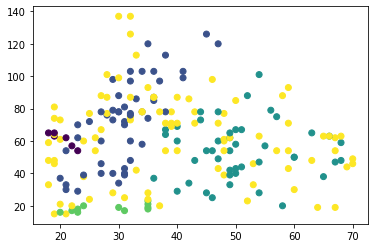

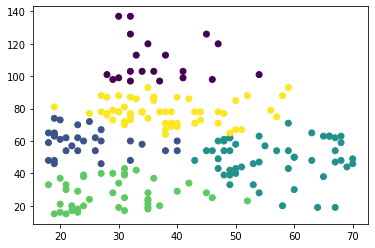

In [9]:
plt.scatter(x[:, 1], x[:, 2],c=em_predictions)
plt.show()
plt.scatter(x[:, 1], x[:, 2],c=km_predictions)